# Homework 7 Duvall Pinkney

This assignment uses the weather data from Lab 1, from [https://github.com/fivethirtyeight/data/tree/master/us-weather-history](https://github.com/fivethirtyeight/data/tree/master/us-weather-history).  We used KNYC.csv in Lab 1, and will also use KCLT.csv in this homework, which is the weather data for Charlotte, NC, in this assignment.

The URLs for the two CSV files are:
KNYC.csv: [https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv)
KCLT.csv: [https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv)

This assignment will look at different ways to predict the actual maximum daily temperature in New York using linear regression.  The actual maximum temperature was the maximum temperature recorded on that day.

### Question 0:  Loading the data

Import libraries and load the data.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

## Question 1 

*Predicting the NYC actual max temperature from the NYC average max temperature*
    
a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship? Yes I beleieve there is a linear relationship however , to a point. That is because the weather changes with the seasons.

In [3]:
url1 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv"
df1 = pd.read_csv(url1)
df1

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,75,69,81,67,82,56,100,1979,1952,0.00,0.13,4.29
361,2015-6-27,65,58,71,67,82,55,101,1940,1966,1.12,0.12,2.11
362,2015-6-28,68,62,73,67,83,54,96,1995,1991,0.29,0.13,1.69
363,2015-6-29,70,63,76,67,83,52,101,1919,1934,0.00,0.12,2.57


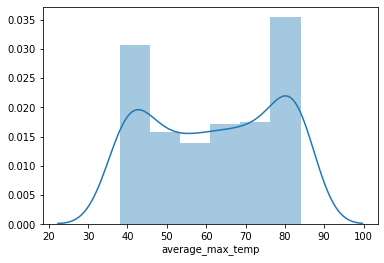

In [7]:
sns.distplot(df1['average_max_temp'])

In [4]:
url2 = "https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv"
df2 = pd.read_csv(url2)
df2

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,85,70,100,67,88,55,102,1979,1952,1.21,0.11,1.98
361,2015-6-27,82,71,92,67,88,56,103,2012,1954,0.55,0.11,1.86
362,2015-6-28,76,66,85,67,88,53,101,1968,1959,0.00,0.11,1.83
363,2015-6-29,73,59,87,67,88,54,104,1974,2012,0.00,0.11,2.39


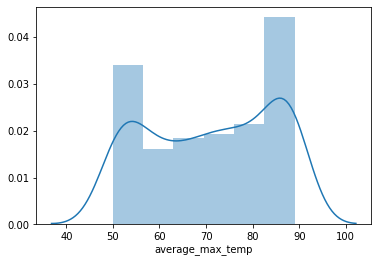

In [8]:
sns.distplot(df2["average_max_temp"])

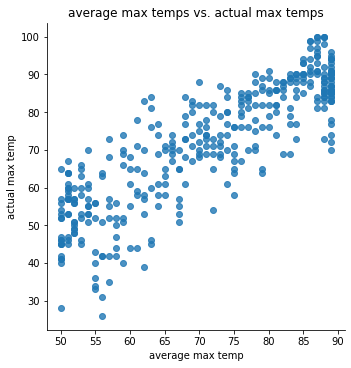

In [9]:
sns.lmplot(x='average_max_temp', y='actual_max_temp', data=df2, fit_reg=False)
plt.title('average max temps vs. actual max temps')
plt.xlabel('average max temp')
plt.ylabel('actual max temp');

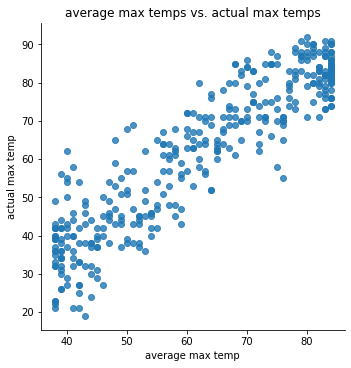

In [10]:
sns.lmplot(x='average_max_temp', y='actual_max_temp', data=df1, fit_reg=False)
plt.title('average max temps vs. actual max temps')
plt.xlabel('average max temp')
plt.ylabel('actual max temp');

b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What is the equation for the linear model?  What proportion of the variance is explained by the model? Y = mx + b 

In [43]:
lm = smf.ols("actual_max_temp ~ average_max_temp ", data = df1).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1776.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          7.37e-142
Time:                        21:46:15   Log-Likelihood:                -1277.0
No. Observations:                 365   AIC:                             2558.
Df Residuals:                     363   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.7238      1.678     -4.007      0.000     -10.024      -3.424
average_max_temp     1.1027      0.026     42.137      0.000       1.051       1.154
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.714
Skew:                           0.101   Prob(JB):                        0.700
Kurtosis:                       2.924   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm = smf.ols("actual_max_temp ~ average_max_temp", data = df2).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     986.0
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.63e-105
Time:                        21:46:36   Log-Likelihood:                -1300.0
No. Observations:                 365   AIC:                             2604.
Df Residuals:                     363   BIC:                             2612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.3461      2.398     -0.978      0.329      -7.062       2.369
average_max_temp     1.0422      0.033     31.401      0.000       0.977       1.107
==============================================================================
Omnibus:                       16.405   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.335
Skew:                          -0.508   Prob(JB):                     0.000172
Kurtosis:                       3.330   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
frames1 = [df1, df2]
result1 = pd.concat(frames1)

c. Plot a histogram of the residuals of your model from part b.  Describe their distribution.  Based on this and your results from parts a and b, do you think this linear model is a good fit?  Why or why not?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013DCAACA348>,
      dtype=object)

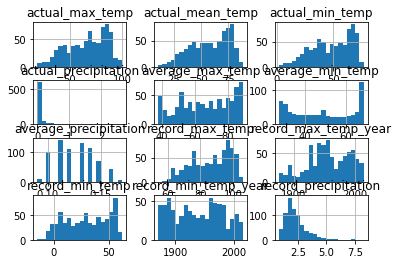

In [47]:
result1.hist(bins = 20)

## Question 2
*Predicting the NYC actual max temperature from the Charlotte actual max temperature and the NYC average max temperature*

Note:  To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]`

a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?

In [15]:
df3 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv")
df3.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07


In [16]:
df4 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv")
df4.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [23]:
frames = [df3, df4]
result = pd.concat(frames)

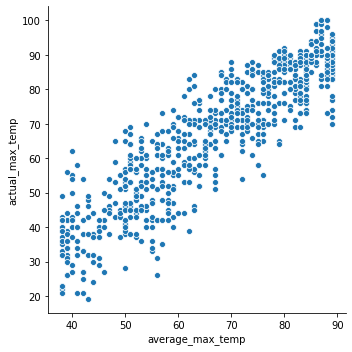

In [25]:





sns.relplot(x ="average_max_temp", y ="actual_max_temp", data = result)

b. Compute the linear regression model where the independent variables are the NYC average max temperature and Charlotte actual max temperature, and the dependent variable is the NYC actual max temperature.  What proportion of the variance is explained by the model?

In [51]:
nyc_weather_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv")
charlotte_weather_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv")


In [58]:
nycdf = nyc_weather_df["average_max_temp"]
nycdf.head()

0    83
1    83
2    83
3    84
4    84
Name: average_max_temp, dtype: int64

In [59]:
chardf = charlotte_weather_df["actual_max_temp"]
chardf.head()

0    91
1    95
2    93
3    86
4    84
Name: actual_max_temp, dtype: int64

In [60]:
lm1 = smf.ols("actual_max_temp ~ average_max_temp", data = nyc_weather_df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1776.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          7.37e-142
Time:                        22:06:53   Log-Likelihood:                -1277.0
No. Observations:                 365   AIC:                             2558.
Df Residuals:                     363   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.7238      1.678     -4.007      0.000     -10.024      -3.424
average_max_temp     1.1027      0.026     42.137      0.000       1.051       1.154
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.714
Skew:                           0.101   Prob(JB):                        0.700
Kurtosis:                       2.924   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
lm2 = smf.ols("actual_max_temp ~ average_max_temp", data = charlotte_weather_df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     986.0
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.63e-105
Time:                        22:07:14   Log-Likelihood:                -1300.0
No. Observations:                 365   AIC:                             2604.
Df Residuals:                     363   BIC:                             2612.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.3461      2.398     -0.978      0.329      -7.062       2.369
average_max_temp     1.0422      0.033     31.401      0.000       0.977       1.107
==============================================================================
Omnibus:                       16.405   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.335
Skew:                          -0.508   Prob(JB):                     0.000172
Kurtosis:                       3.330   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. Predict the NYC actual max temperature if the Charlotte actual max temperature is 32F and the NYC average max temperature is 40F.

In [68]:
nyc_weather_df2 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv")


In [69]:
charlotte_weather_df2 = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCLT.csv")

In [70]:
freezechardf = charlotte_weather_df2["actual_max_temp"] == 32

In [71]:
coolnycdf = nyc_weather_df2["average_max_temp"] == 40

In [72]:
lm3 = smf.ols("actual_max_temp ~ average_max_temp", data = freezechardf).fit()
lm3.summary()

PatsyError: Error evaluating factor: NameError: name 'actual_max_temp' is not defined
    actual_max_temp ~ average_max_temp
    ^^^^^^^^^^^^^^^

In [67]:
lm4 = smf.ols("actual_max_temp ~ average_max_temp", data = coolnycdf).fit()
lm4.summary()

PatsyError: Error evaluating factor: NameError: name 'actual_max_temp' is not defined
    actual_max_temp ~ average_max_temp
    ^^^^^^^^^^^^^^^

d. Plot a histogram of the residuals of your model from part b.  Describe their distribution.

e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.  What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?

f. Based on the previous parts, do you think this linear model is a good fit?